### Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt
import copy
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '../tune_octupole'))
import analysis_functions 

import matplotlib
import seaborn as sns


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Do sensitivity analysis for chromaticity

In [2]:
# Define study
STUDY_NAME = "injection_chroma"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)
df

normalized amplitude in xy-plane    qx  \
beam  name base collider dqx  dqy                                            
lhcb1 base_collider      10.0 10.0                             5.562  62.3   
                         11.0 11.0                             5.625  62.3   
                         12.0 12.0                             5.594  62.3   
                         13.0 13.0                             5.438  62.3   
                         14.0 14.0                             5.594  62.3   
                         15.0 15.0                             5.438  62.3   
                         16.0 16.0                             5.500  62.3   
                         17.0 17.0                             5.344  62.3   
                         18.0 18.0                             5.375  62.3   
                         19.0 19.0                             5.250  62.3   
                         20.0 20.0                             5.125  62.3   
                         21.0 21.0                             5.062  62.3   
                         22.0 22.0                             5.094  62.3   
                         23.0 23.0                             5.031  62.3   
                         24.0 24.0                             5.188  62.3   
                         25.0 25.0                             5.062  62.3   
                         26.0 26.0                             5.156  62.3   
                         27.0 27.0                             4.812  62.3   
                         28.0 28.0                             5.031  62.3   
                         29.0 29.0                             4.906  62.3   
                         30.0 30.0                             4.781  62.3   

                                       qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  name base collider dqx  dqy                                               
lhcb1 base_collider      10.0 10.0  60.31  10.0  10.0      1130.0      1127.0   
                         11.0 11.0  60.31  11.0  11.0      1130.0      1127.0   
                         12.0 12.0  60.31  12.0  12.0      1130.0      1127.0   
                         13.0 13.0  60.31  13.0  13.0      1130.0      1127.0   
                         14.0 14.0  60.31  14.0  14.0      1130.0      1127.0   
                         15.0 15.0  60.31  15.0  15.0      1130.0      1127.0   
                         16.0 16.0  60.31  16.0  16.0      1130.0      1127.0   
                         17.0 17.0  60.31  17.0  17.0      1130.0      1127.0   
                         18.0 18.0  60.31  18.0  18.0      1130.0      1127.0   
                         19.0 19.0  60.31  19.0  19.0      1130.0      1127.0   
                         20.0 20.0  60.31  20.0  20.0      1130.0      1127.0   
                         21.0 21.0  60.31  21.0  21.0      1130.0      1127.0   
                         22.0 22.0  60.31  22.0  22.0      1130.0      1127.0   
                         23.0 23.0  60.31  23.0  23.0      1130.0      1127.0   
                         24.0 24.0  60.31  24.0  24.0      1130.0      1127.0   
                         25.0 25.0  60.31  25.0  25.0      1130.0      1127.0   
                         26.0 26.0  60.31  26.0  26.0      1130.0      1127.0   
                         27.0 27.0  60.31  27.0  27.0      1130.0      1127.0   
                         28.0 28.0  60.31  28.0  28.0      1130.0      1127.0   
                         29.0 29.0  60.31  29.0  29.0      1130.0      1127.0   
                         30.0 30.0  60.31  30.0  30.0      1130.0      1127.0   

                                    i_oct_b1  i_oct_b2  \
beam  name base collider dqx  dqy                        
lhcb1 base_collider      10.0 10.0     -45.0     -45.0   
                         11.0 11.0     -45.0     -45.0   
                         12.0 12.0     -45.0     -45.0   
                         13.0 13.0     -45.0     -45.0   
                         14.0

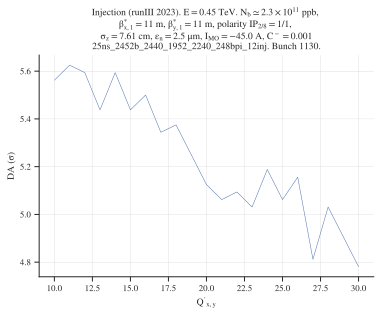

In [4]:
# Plot evolution of DA with chromaticity
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(df["dqx"], df["normalized amplitude in xy-plane"], "-")
plt.xlabel(r"$Q'_{x,y}$")
plt.ylabel(r"DA ($\sigma$)")
plt.title(analysis_functions.get_title_from_conf(
    conf_mad,
    conf_collider,
    type_crossing=None,
    betx=11,
    bety=11,
    Nb=True,
    levelling="",
    CC=False,
    display_intensity=True,
    phase_knob=None,
    octupoles=None,
    LHC_version=None,
    name_filling_scheme=None,
    emittance=None,
    chroma = '',
))
plt.grid()
plt.savefig("chroma.pdf")
plt.show()

### Do sensitivity analysis for voltage

In [5]:
# Define study
STUDY_NAME = "injection_voltage"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

In [6]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)
df

normalized amplitude in xy-plane    qx  \
beam  name base collider voltage                                           
lhcb1 base_collider      4.0                                 5.594  62.3   
                         4.5                                 5.312  62.3   
                         5.0                                 5.469  62.3   
                         5.5                                 5.312  62.3   
                         6.0                                 5.406  62.3   
                         6.5                                 5.281  62.3   
                         7.0                                 5.281  62.3   
                         7.5                                 5.375  62.3   
                         8.0                                 5.438  62.3   
                         8.5                                 5.375  62.3   
                         9.0                                 5.156  62.3   
                         9.5                                 5.375  62.3   
                         10.0                                5.375  62.3   
                         10.5                                5.250  62.3   
                         11.0                                5.250  62.3   
                         11.5                                5.562  62.3   
                         12.0                                5.438  62.3   

                                     qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  name base collider voltage                                              
lhcb1 base_collider      4.0      60.31  15.0  15.0      1130.0      1127.0   
                         4.5      60.31  15.0  15.0      1130.0      1127.0   
                         5.0      60.31  15.0  15.0      1130.0      1127.0   
                         5.5      60.31  15.0  15.0      1130.0      1127.0   
                         6.0      60.31  15.0  15.0      1130.0      1127.0   
                         6.5      60.31  15.0  15.0      1130.0      1127.0   
                         7.0      60.31  15.0  15.0      1130.0      1127.0   
                         7.5      60.31  15.0  15.0      1130.0      1127.0   
                         8.0      60.31  15.0  15.0      1130.0      1127.0   
                         8.5      60.31  15.0  15.0      1130.0      1127.0   
                         9.0      60.31  15.0  15.0      1130.0      1127.0   
                         9.5      60.31  15.0  15.0      1130.0      1127.0   
                         10.0     60.31  15.0  15.0      1130.0      1127.0   
                         10.5     60.31  15.0  15.0      1130.0      1127.0   
                         11.0     60.31  15.0  15.0      1130.0      1127.0   
                         11.5     60.31  15.0  15.0      1130.0      1127.0   
                         12.0     60.31  15.0  15.0      1130.0      1127.0   

                                  i_oct_b1  i_oct_b2  num_particles_per_bunch  \
beam  name base collider voltage                                                
lhcb1 base_collider      4.0         -45.0     -45.0             2.300000e+11   
                         4.5         -45.0     -45.0             2.300000e+11   
                         5.0         -45.0     -45.0             2.300000e+11   
                         5.5         -45.0     -45.0             2.300000e+11   
                         6.0         -45.0     -45.0             2.300000e+11   
                         6.5         -45.0     -45.0             2.300000e+11   
                         7.0         -45.0     -45.0             2.300000e+11   
                         7.5         -45.0     -45.0             2.300000e+11   
                         8.0         -45.0     -45.0             2.300000e+11   
                         8.5         -45.0     -45.0             2.300000e+11   
                         9.0         -45.0     -45.0             2.300000e+11   
                         9.5      

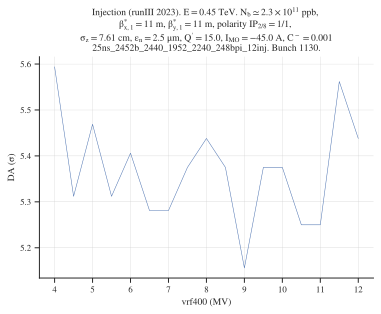

In [7]:
# Plot evolution of DA with chromaticity
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(df["voltage"], df["normalized amplitude in xy-plane"], "-")
plt.xlabel(r"vrf400 (MV)")
plt.ylabel(r"DA ($\sigma$)")
plt.title(analysis_functions.get_title_from_conf(
    conf_mad,
    conf_collider,
    type_crossing=None,
    betx=11,
    bety=11,
    Nb=True,
    levelling="",
    CC=False,
    display_intensity=True,
    phase_knob=None,
    octupoles=None,
    LHC_version=None,
    name_filling_scheme=None,
    emittance=None,
    chroma = None,
))
plt.grid()
plt.savefig("voltage.pdf")
plt.show()


### Do sensitivity analysis for bunch length

In [8]:
# Define study
STUDY_NAME = "injection_sigmaz"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

In [9]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)
df

normalized amplitude in xy-plane    qx  \
beam  name base collider sigma_z                                           
lhcb1 base_collider      0.070                               5.656  62.3   
                         0.071                               5.562  62.3   
                         0.072                               5.438  62.3   
                         0.073                               5.562  62.3   
                         0.074                               5.438  62.3   
                         0.075                               5.438  62.3   
                         0.076                               5.562  62.3   
                         0.077                               5.469  62.3   
                         0.078                               5.500  62.3   
                         0.079                               5.562  62.3   
                         0.080                               5.406  62.3   
                         0.081                               5.562  62.3   
                         0.082                               5.562  62.3   
                         0.083                               5.500  62.3   
                         0.084                               5.469  62.3   
                         0.085                               5.438  62.3   
                         0.086                               5.562  62.3   
                         0.087                               5.562  62.3   
                         0.088                               5.344  62.3   
                         0.089                               5.562  62.3   
                         0.090                               5.562  62.3   
                         0.091                               5.469  62.3   
                         0.092                               5.438  62.3   
                         0.093                               5.562  62.3   
                         0.094                               5.594  62.3   
                         0.095                               5.562  62.3   
                         0.096                               5.562  62.3   
                         0.097                               5.625  62.3   
                         0.098                               5.469  62.3   
                         0.099                               5.469  62.3   
                         0.100                               5.406  62.3   

                                     qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  name base collider sigma_z                                              
lhcb1 base_collider      0.070    60.31  15.0  15.0      1130.0      1127.0   
                         0.071    60.31  15.0  15.0      1130.0      1127.0   
                         0.072    60.31  15.0  15.0      1130.0      1127.0   
                         0.073    60.31  15.0  15.0      1130.0      1127.0   
                         0.074    60.31  15.0  15.0      1130.0      1127.0   
                         0.075    60.31  15.0  15.0      1130.0      1127.0   
                         0.076    60.31  15.0  15.0      1130.0      1127.0   
                         0.077    60.31  15.0  15.0      1130.0      1127.0   
                         0.078    60.31  15.0  15.0      1130.0      1127.0   
                         0.079    60.31  15.0  15.0      1130.0      1127.0   
                         0.080    60.31  15.0  15.0      1130.0      1127.0   
                         0.081    60.31  15.0  15.0      1130.0      1127.0   
                         0.082    60.31  15.0  15.0      1130.0      1127.0   
                         0.083    60.31  15.0  15.0      1130.0      1127.0   
                         0.084    60.31  15.0  15.0      1130.0      1127.0   
                         0.085    60.31  15.0  15.0      1130.0      1127.0   
                         0.086    60.31  15.0  15.0      1130.0      1127.0   
                        

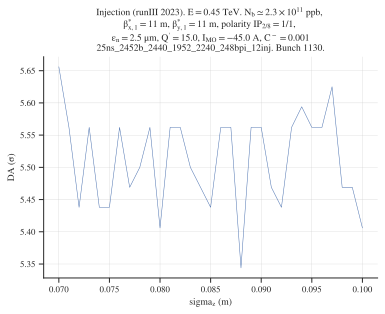

In [10]:
# Plot evolution of DA with chromaticity
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(df["sigma_z"], df["normalized amplitude in xy-plane"], "-")
plt.xlabel(r"$sigma_z$ (m)")
plt.ylabel(r"DA ($\sigma$)")
plt.title(analysis_functions.get_title_from_conf(
    conf_mad,
    conf_collider,
    type_crossing=None,
    betx=11,
    bety=11,
    Nb=True,
    levelling="",
    CC=False,
    display_intensity=True,
    phase_knob=None,
    octupoles=None,
    LHC_version=None,
    name_filling_scheme=None,
    emittance=None,
    chroma = None,
    sigma_z = "",
))
plt.grid()
plt.savefig("sigmaz.pdf")
plt.show()

### Do sensitivity analysis for emittance

In [11]:
# Define study
STUDY_NAME = "injection_emittance"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

In [14]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
#df = df.round(3)
df

normalized amplitude in xy-plane  \
beam  name base collider nemitt_x nemitt_y                                     
lhcb1 base_collider      0.000002 0.000002                           6.81250   
                                  0.000002                           6.81250   
                                  0.000002                           6.59375   
                                  0.000002                           7.40625   
                                  0.000002                           6.65625   
                                  0.000002                           6.37500   
                                  0.000002                           6.56250   
                                  0.000002                           6.40625   
                                  0.000002                           6.18750   
                                  0.000002                           6.31250   
                                  0.000002                           6.12500   
                                  0.000002                           6.09375   
                                  0.000002                           5.93750   
                                  0.000002                           5.96875   
                                  0.000002                           5.75000   
                                  0.000002                           5.75000   
                                  0.000002                           5.68750   
                                  0.000002                           5.71875   
                                  0.000002                           5.56250   
                                  0.000002                           5.46875   
                                  0.000002                           5.56250   
                         0.000003 0.000003                           5.50000   
                                  0.000003                           5.34375   
                                  0.000003                           5.28125   
                                  0.000003                           5.37500   
                                  0.000003                           5.31250   
                                  0.000003                           5.18750   
                                  0.000003                           5.18750   
                                  0.000003                           5.09375   
                                  0.000003                           5.06250   
                                  0.000003                           5.03125   

                                              qx     qy   dqx   dqy  \
beam  name base collider nemitt_x nemitt_y                            
lhcb1 base_collider      0.000002 0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.31  15.0  15.0   
                                  0.000002  62.3  60.3

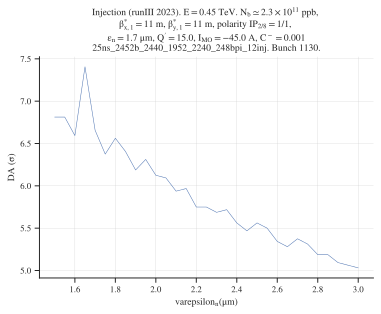

In [15]:
# Plot evolution of DA with chromaticity
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(df["nemitt_x"]* 1e6, df["normalized amplitude in xy-plane"], "-")
plt.xlabel(r"$varepsilon_n (\mu m)$")
plt.ylabel(r"DA ($\sigma$)")
plt.title(analysis_functions.get_title_from_conf(
    conf_mad,
    conf_collider,
    type_crossing=None,
    betx=11,
    bety=11,
    Nb=True,
    levelling="",
    CC=False,
    display_intensity=True,
    phase_knob=None,
    octupoles=None,
    LHC_version=None,
    name_filling_scheme=None,
    emittance=None,
    chroma = None,
    sigma_z = "",
))
plt.grid()
plt.savefig("emittance.pdf")
plt.show()